In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
"""
imposto tema seaborn e cambio dimensioni grafici
"""
plt.rcParams["figure.figsize"] = (16,10)
sns.set_theme(palette="dark")

In [ ]:
"""
importo dataset
"""
df=pd.read_csv("https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/datasets/mall_customers.csv")


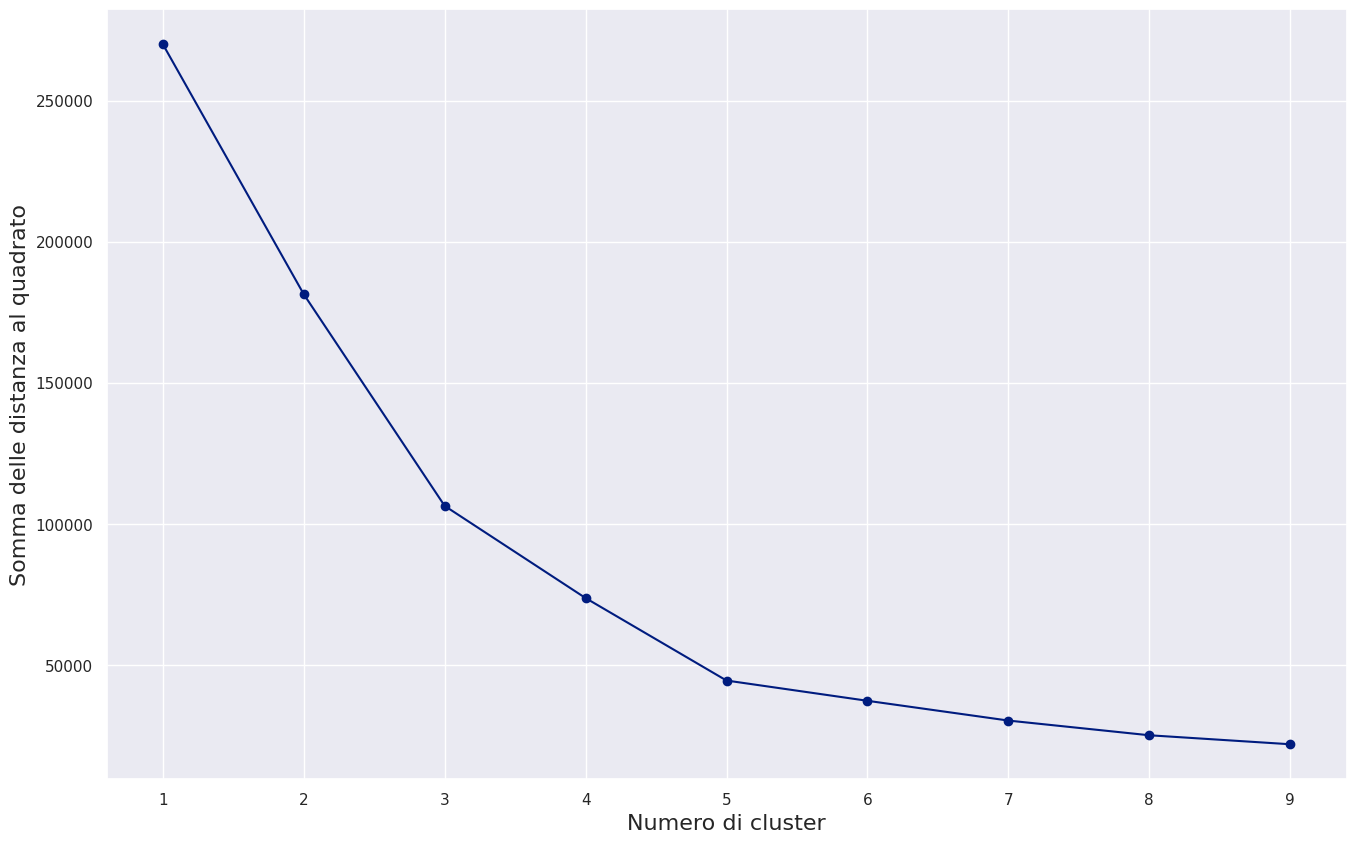

In [ ]:
"""
annual income VS spending score
"""
RANDOM_SEED=1

X= df[["Annual Income (k$)","Spending Score (1-100)"]].values

"""
Elbow curve
"""

def plot_ssd_curve(X):
  ssd={}
  for k in range(1,10):
    k_means=KMeans(n_clusters=k,init="k-means++",max_iter=300,n_init=10,random_state=0).fit(X)
    ssd[k] = k_means.inertia_
  plt.figure()
  plt.plot(list(ssd.keys()), list(ssd.values()),marker='o')
  plt.xlabel("Numero di cluster", fontsize=16)
  plt.ylabel("Somma delle distanza al quadrato", fontsize=16)
  plt.show()

plot_ssd_curve(X)

In [ ]:
"""
creo cluster sulla base della curva. sono 5
"""
def plot_cluster(model, data, axlabels=None, print_ssd=False):
    centres=  model.cluster_centers_
    y_pred= model.predict(data)
    sns.scatterplot(x=data[:,0],y=data[:,1], hue=y_pred, s=100)
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', s=200, alpha=0.5)

    if axlabels!=None:
     plt.xlabel(axlabels[0], fontsize=16) ##aggiungo titoli se true
     plt.ylabel(axlabels[1], fontsize=16)

    if print_ssd:
     plt.text(X[:,0].max()-10, 0, f"SSD={model.inertia_:.2f}") ## aggiungo sul grafico valore ssd se è true

    plt.show()

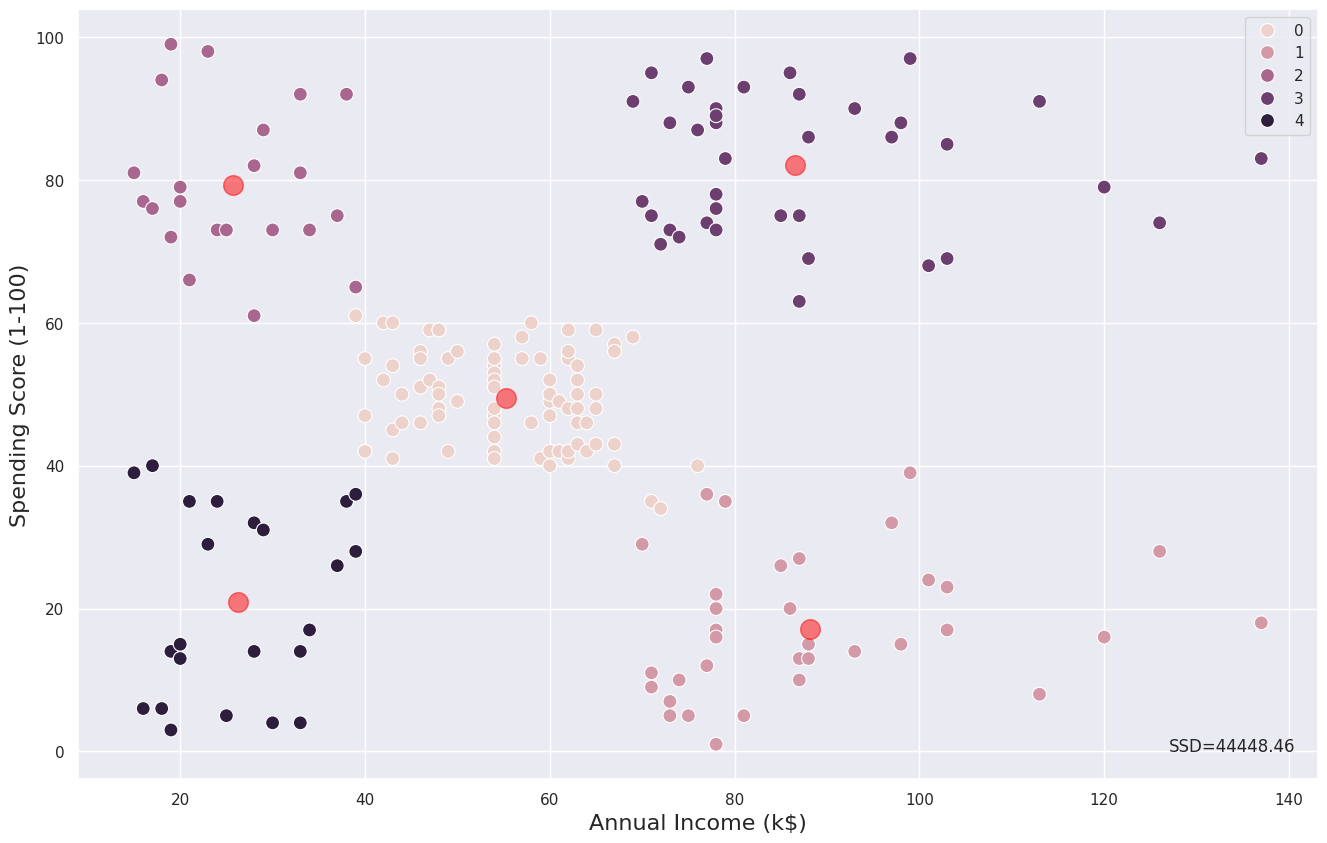

In [ ]:
###creo il modello


kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = RANDOM_SEED)
kmeans.fit(X)
kmeans.inertia_

plot_cluster(kmeans, X, axlabels=["Annual Income (k$)","Spending Score (1-100)"], print_ssd=True)